In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

#for development purposes
%reload_ext autoreload
%autoreload 2
pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

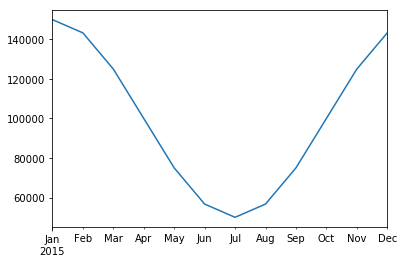

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

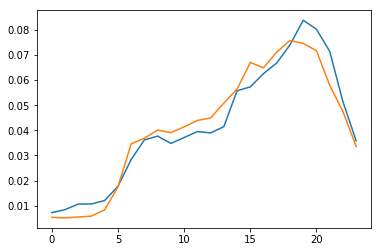

In [3]:
DWL =  el.gen_daily_stoch_el() #daily load working

DNWL = el.gen_daily_stoch_el() #daily load non working

plt.plot(DNWL)
plt.plot(DWL)

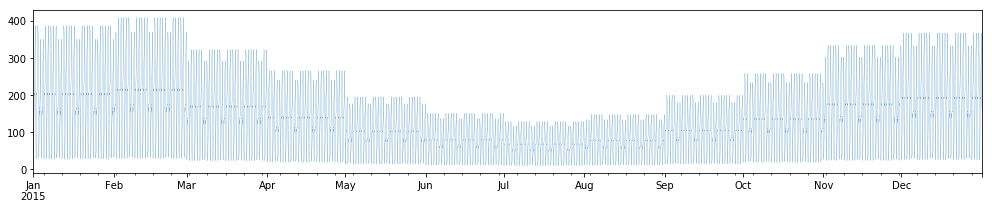

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name = 'House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print ('error = {:.2f}'.format(Load1.sum() - ML.sum()))

error = -0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,873.8,833.7,728.2,578.5,441,328,288.5,333.4,433.9,582.5,730.2,827
1,890.8,849.1,742.4,586.8,452.7,332.7,292.1,342.3,440.1,593.9,746,837.2
2,1016,967.9,847,666.6,519.5,377.9,331.3,392.8,499.9,677.6,852.6,949.5
3,1057,1007,880.8,694.3,539.2,393.6,345.3,407.7,520.7,704.7,886.2,989.5
4,1394,1329,1162,921.4,705.2,522.4,459.3,533.1,691,929.3,1166,1316
5,2633,2515,2194,1755,1317,994.9,877.2,995.5,1316,1755,2194,2514
6,4959,4741,4133,3319,2466,1882,1662,1864,2490,3306,4126,4764
7,5505,5259,4587,3671,2751,2081,1836,2080,2753,3670,4586,5262
8,5925,5662,4938,3955,2957,2243,1979,2236,2967,3950,4935,5671


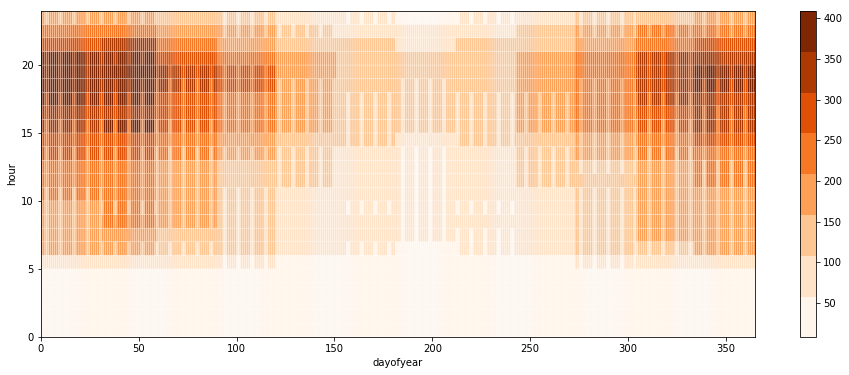

In [7]:
el.plot_heatmap(Load1)

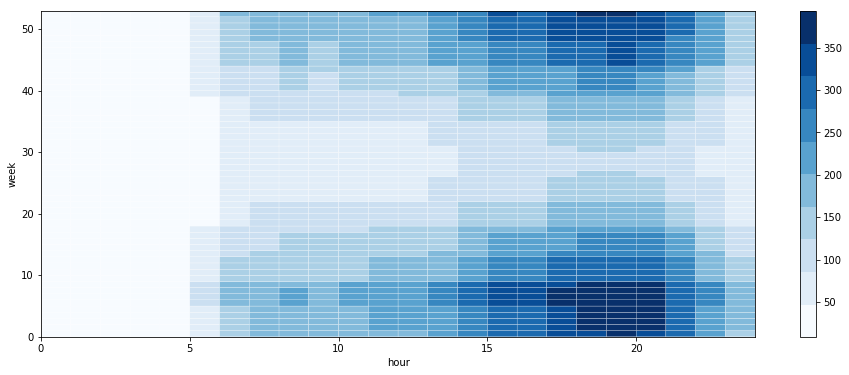

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

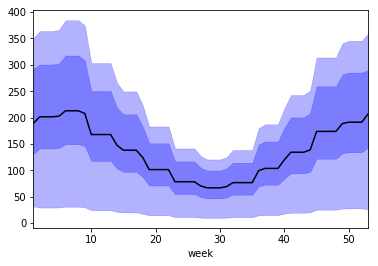

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

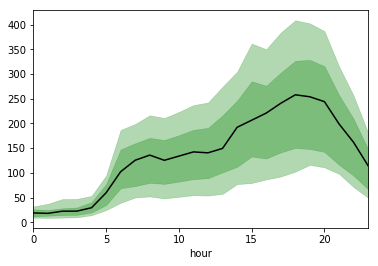

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

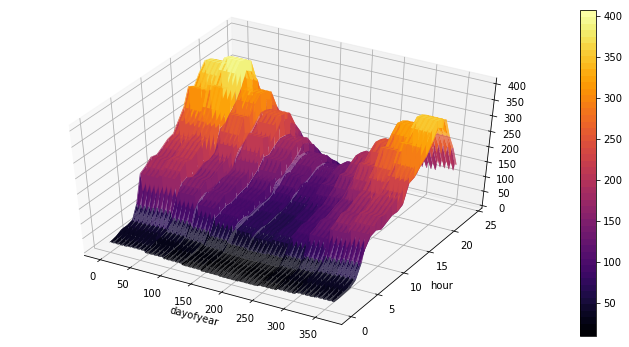

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

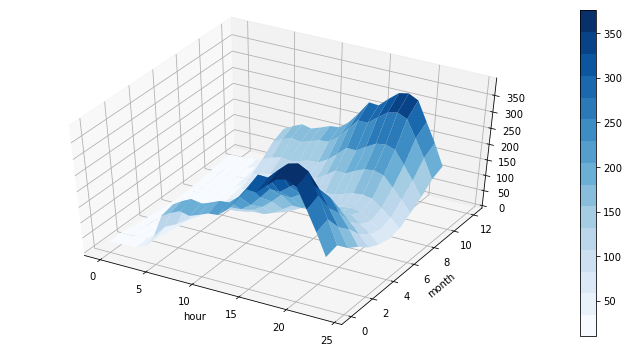

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

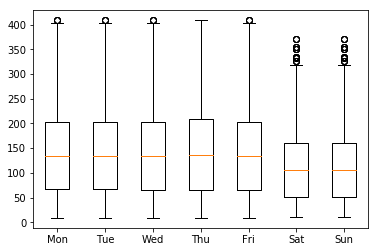

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

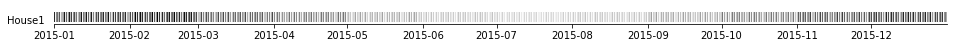

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [15]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

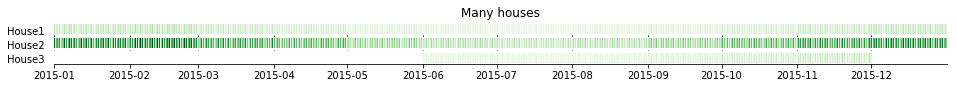

In [16]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

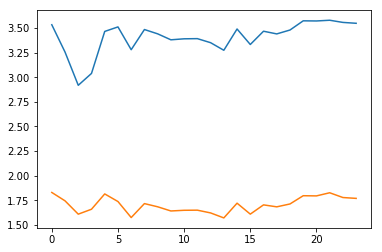

In [17]:
plt.plot(el.get_load_archetypes(Load1,2));

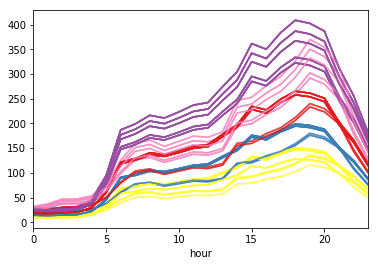

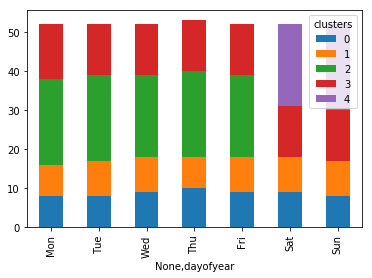

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([ 409.11173182,  409.11173182,  409.11173182, ...,    8.65022658,
           8.65022658,    8.65022658]))

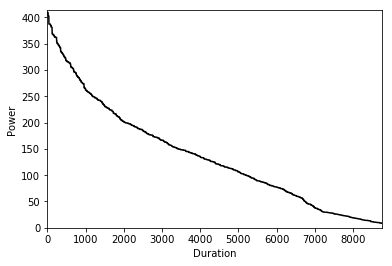

In [20]:
el.plot_LDC(Load1, x_norm=False)

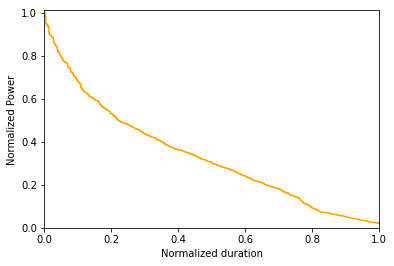

In [21]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

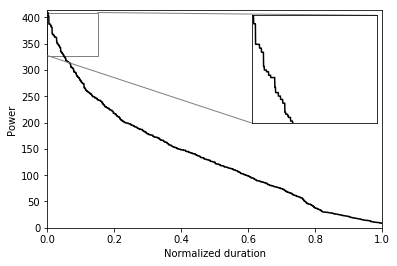

In [22]:
el.plot_LDC(Load1, zoom_peak=True)

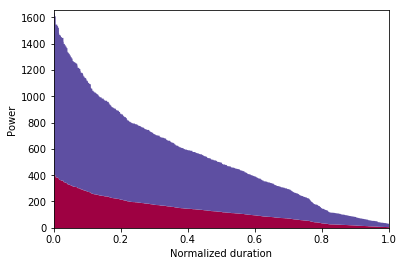

In [23]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

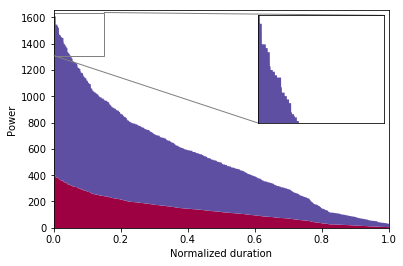

In [24]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

# Add noise to a load

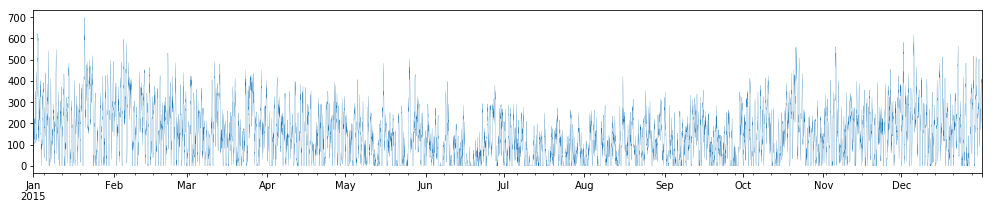

In [25]:
Load1_noise = el.add_noise(Load1, 3, 100) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

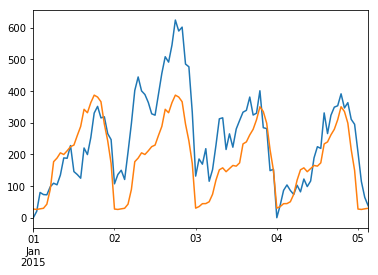

In [26]:
Load1_noise.iloc[0:100].plot()
Load1.iloc[0:100].plot()

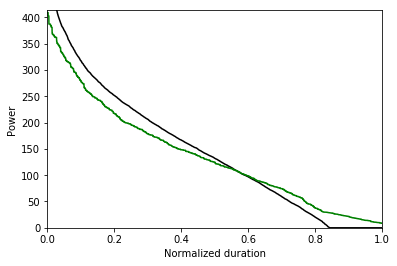

In [27]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [28]:
el.get_load_stats(Load1)

,2015
Autocorrelation(1),0.9444
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3348
Load ratio (max/min),47.29
Max,409.1
Min (2%),8.65
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-96.1255002539, 57.1323068969)"
Sum,1.2e+06


We can also check the statistics per defined time period. Example for month ('m'):

In [29]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Autocorrelation(1),0.9247,0.9247,0.9249,0.9251,0.9245,0.9251,0.9251,0.9248,0.9251,0.9247,0.9249,0.9251
Average,201.6,213.2,168,138.9,100.8,78.75,67.2,76.21,104.2,134.4,173.6,192.6
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.5208,0.5212,0.5208,0.5231,0.5176,0.5231,0.524,0.5176,0.5231,0.5208,0.5198,0.524
Load ratio (max/min),14.83,14.83,14.83,14.83,14.83,14.83,14.83,14.83,14.83,14.83,14.83,14.83
Max,387.1,409.1,322.6,265.5,194.8,150.5,128.3,147.2,199.1,258.1,334,367.6
Min (2%),26.11,27.59,21.76,17.91,13.14,10.15,8.65,9.931,13.43,17.41,22.53,24.79
Periodicity,"(124.0, 23.0)","(112.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)"
Ramps (98%),"(-144.188250381, 87.5167394273)","(-152.373107182, 92.4846336769)","(-120.156875317, 72.9306161894)","(-98.8806897517, 60.0167873355)","(-72.5433097711, 44.0310075312)","(-56.0640951173, 34.0287560924)","(-47.766979357, 28.992724959)","(-54.8415136039, 33.2866959907)","(-74.1605173138, 45.0125905016)","(-96.1255002539, 58.3444929515)","(-124.393175409, 75.501887914)","(-136.901376299, 83.0938862574)"
Sum,1.5e+05,1.433e+05,1.25e+05,1e+05,7.5e+04,5.67e+04,5e+04,5.67e+04,7.5e+04,1e+05,1.25e+05,1.433e+05


## Load Shifting

The following function performs load shifting  (or peak shaving) from peak to off-peak timesteps based on given specifications, percentage of peak reduction and percentage of hours per month to peak.

In [30]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

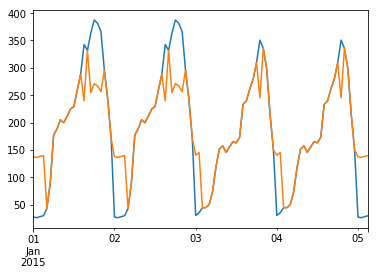

In [31]:
Load1[0:100].plot()
Load1_DR[0:100].plot()

In [32]:
el.get_load_stats(Load1)

,2015
Autocorrelation(1),0.9444
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3348
Load ratio (max/min),47.29
Max,409.1
Min (2%),8.65
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-96.1255002539, 57.1323068969)"
Sum,1.2e+06


As shown below it is less peaky as expected

In [33]:
el.get_load_stats(Load1_DR)

,2015
Autocorrelation(1),0.8997
Average,135.6
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3827
Load ratio (max/min),25.03
Max,354.4
Min (2%),14.16
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-80.9027948812, 79.0279031106)"
Sum,1.188e+06


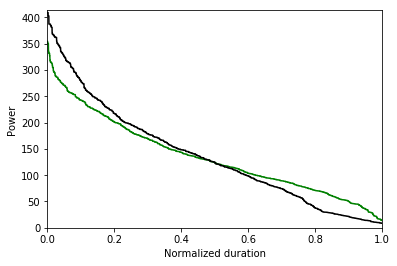

In [34]:
el.plot_LDC(Load1_DR, color='g')
el.plot_LDC(Load1)

## Sample new loads from load duration curve

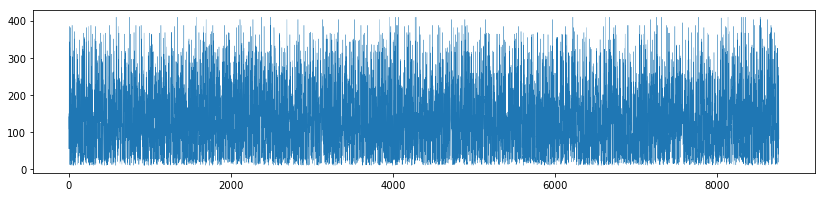

In [35]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

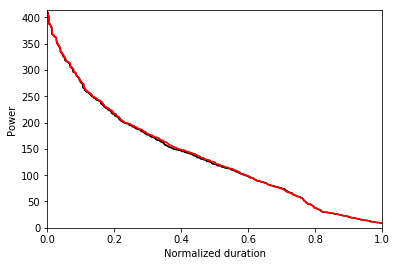

In [36]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')